In [1]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [7, 7]

random_state = 1000
np.random.seed(1)

# Four Peaks Problem

In [2]:
# Problem definition
length = 150
t_pct = 0.1

# Initialize fitness function object
fitness = mlrh.FourPeaks(t_pct=t_pct)

prob = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)
experiment_name = "four_peaks"
output_directory = "four_peaks"

## Mimic

In [3]:
mmc = mlrh.MIMICRunner(problem=prob,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[1000, 2000, 3000],
                       keep_percent_list=[0.1, 0.15, 0.20],
                       iteration_list=[50],
                       max_attempts=100,
                       use_fast_mimic=True)
mmc_stats, mmc_curve = mmc.run()

In [4]:
columns = ['Time', 'Fitness', 'Population Size', 'Keep Percent']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./four_peaks/four_peaks/mimic__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Population Size,Keep Percent
13,20.069209,259.0,3000,0.10
11,14.099799,229.0,2000,0.20
3,10.477092,216.0,1000,0.15
9,22.882482,215.0,2000,0.15
7,23.081074,180.0,2000,0.10
17,19.811251,102.0,3000,0.20
15,27.482061,87.0,3000,0.15
5,14.625137,40.0,1000,0.20
1,16.360291,39.0,1000,0.10
6,0.011483,3.0,2000,0.10


In [5]:
best_index_in_curve = mmc_curve.Fitness.idxmax()
best_kp = mmc_curve.iloc[best_index_in_curve]['Keep Percent']
best_pz = mmc_curve.iloc[best_index_in_curve]['Population Size']
best_curve_mmc = mmc_curve.loc[(mmc_curve['Keep Percent'] == best_kp) & (mmc_curve['Population Size'] == best_pz)]
best_curve_mmc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

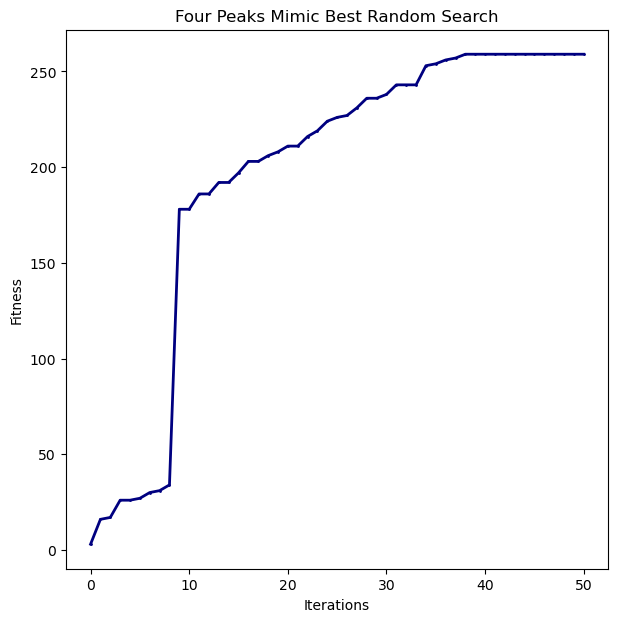

In [6]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Four Peaks Mimic Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Genetic Algorithm

In [7]:
ga = mlrh.GARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=100,
                   iteration_list=[50],
                   population_sizes=[500, 1000, 2000, 3000],
                   mutation_rates=[0.1, 0.25, 0.5])
ga_stats, ga_curve = ga.run()

In [8]:
columns = ['Time', 'Fitness', 'Population Size', 'Mutation Rate']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./four_peaks/four_peaks/ga__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Population Size,Mutation Rate
1,0.632276,202.0,500,0.10
23,5.823673,200.0,3000,0.50
7,1.250767,200.0,1000,0.10
13,3.198684,199.0,2000,0.10
19,5.685052,196.0,3000,0.10
11,1.302400,196.0,1000,0.50
15,3.252992,195.0,2000,0.25
21,5.735941,194.0,3000,0.25
5,0.566548,191.0,500,0.50
17,3.288202,190.0,2000,0.50


In [9]:
best_index_in_curve = ga_curve.Fitness.idxmax()
best_mr = ga_curve.iloc[best_index_in_curve]['Mutation Rate']
best_pz = ga_curve.iloc[best_index_in_curve]['Population Size']
best_curve_ga = ga_curve.loc[(ga_curve['Mutation Rate'] == best_mr) & (ga_curve['Population Size'] == best_pz)]
best_curve_ga.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

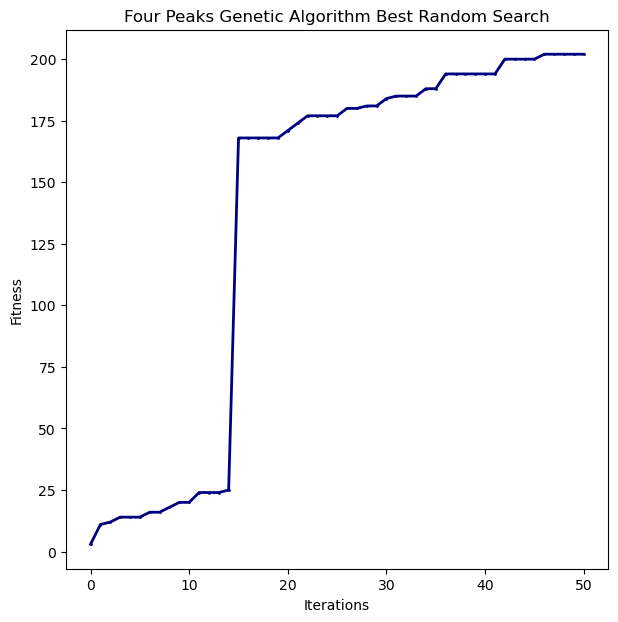

In [10]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Four Peaks Genetic Algorithm Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Simulated Annealing

In [11]:
sa = mlrh.SARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=500,
                   iteration_list=[5000],
                   temperature_list=[0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrh.GeomDecay, mlrh.ExpDecay, mlrh.ArithDecay])
sa_stats, sa_curve = sa.run()

In [12]:
columns = ['Time', 'Fitness', 'Temperature', 'schedule_type']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./four_peaks/four_peaks/sa__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Temperature,schedule_type
21,2.186800,82.0,1.00,exponential
9,2.131962,82.0,0.10,exponential
1,2.127093,82.0,0.05,geometric
19,2.189103,82.0,1.00,geometric
17,2.152456,82.0,0.50,arithmetic
15,2.148935,82.0,0.50,exponential
11,2.127264,82.0,0.10,arithmetic
13,2.137910,82.0,0.50,geometric
5,2.101391,82.0,0.05,arithmetic
3,2.118486,82.0,0.05,exponential


In [13]:
best_index_in_curve = sa_curve.Fitness.idxmax()
best_T = sa_curve.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_curve.loc[sa_curve.Temperature == best_T, :]
best_curve_sa.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

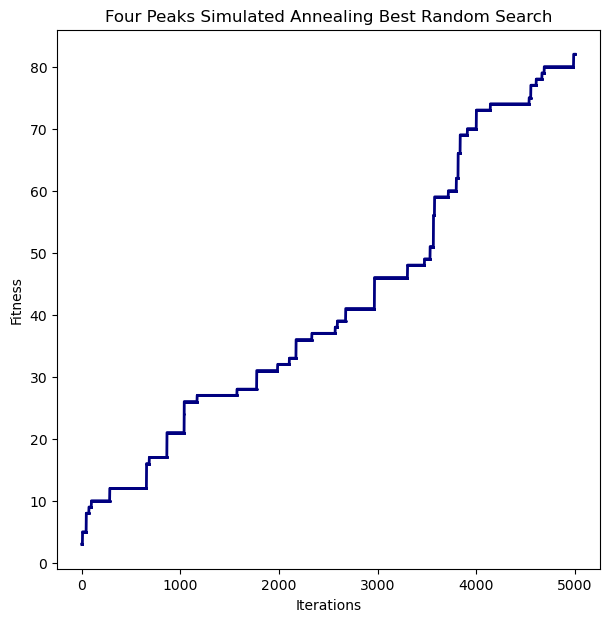

In [14]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Four Peaks Simulated Annealing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Randomized Hill Climbing

In [15]:
rhc = mlrh.RHCRunner(problem=prob,
                    experiment_name=experiment_name,
                    output_directory=output_directory,
                    seed=random_state,
                    max_attempts=500,
                    iteration_list=[5000],
                    restart_list=[10])
rhc_stats, rhc_curve = rhc.run()

In [16]:
columns = ['Time', 'Fitness', 'Restarts', 'current_restart']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./four_peaks/four_peaks/rhc__four_peaks__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Restarts,current_restart
7,15.638683,74.0,10,3
17,56.658804,71.0,10,8
11,31.634685,54.0,10,5
3,3.491070,47.0,10,1
9,22.115128,28.0,10,4
5,7.035189,27.0,10,2
1,0.347466,20.0,10,0
13,34.378751,16.0,10,6
19,63.840695,11.0,10,9
21,66.360359,8.0,10,10


In [17]:
best_index_in_curve = rhc_curve.Fitness.idxmax()
best_cr = rhc_curve.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_curve.loc[rhc_curve.current_restart == best_cr, :]
best_curve_rhc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

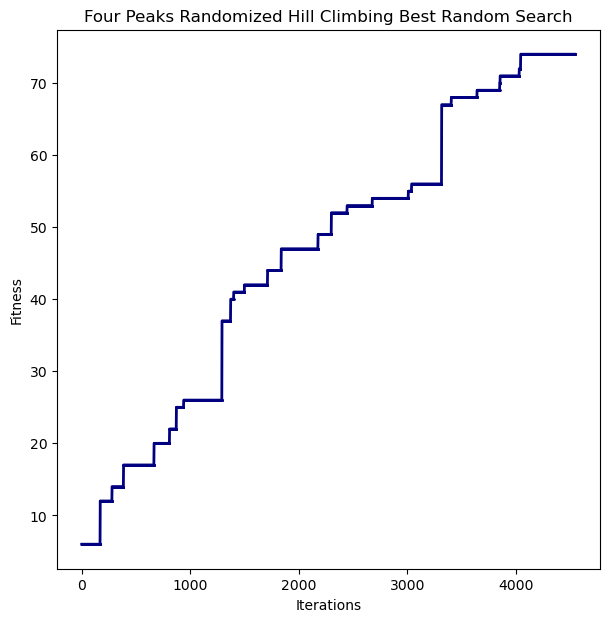

In [18]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Four Peaks Randomized Hill Climbing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Fitness vs iterations

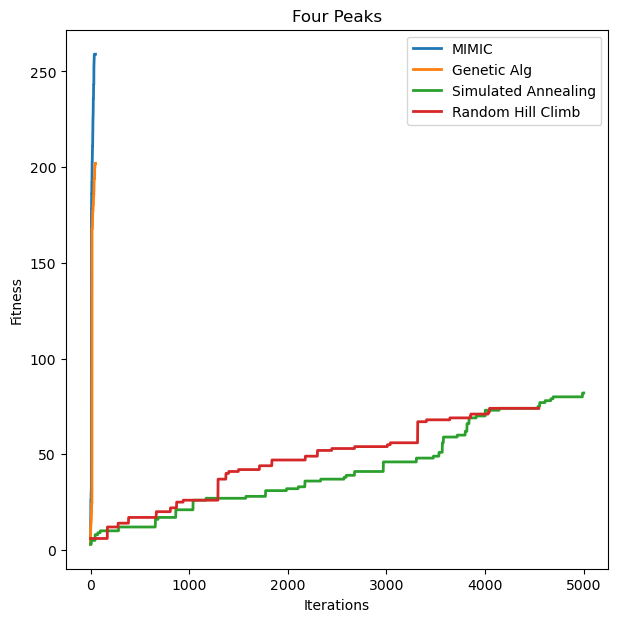

In [19]:
all_curves = {"MIMIC": best_curve_mmc.Fitness, "Genetic Alg": best_curve_ga.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Random Hill Climb": best_curve_rhc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Four Peaks")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.show()

## Function Evaluation vs Input Size

In [28]:
def prob_gen(input=150):
    length = input
    t_pct = 0.1
    fitness = mlrh.FourPeaks(t_pct=t_pct)
    prob = mlrh.DiscreteOpt(length=length,
                        fitness_fn=fitness,
                        maximize=True)

    return prob

In [29]:
def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 50
    keep_pct=0.1
    pop_size = 3000
    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(mimic_curve), t_diff)
    return result

In [30]:
def eval_count_gen(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 50
    mutation_prob=0.1
    pop_size = 500
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(gen_curve), t_diff)
    return result

In [31]:
def eval_count_sa(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    init_temp = 1
    schedule = mlrh.ExpDecay(init_temp)
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(sa_curve), t_diff)
    return result

In [32]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    restarts = 10
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(rhc_curve), t_diff)
    return result

In [33]:
np.random.seed(1)
inputs = range(10, 110, 10)

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Alg": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


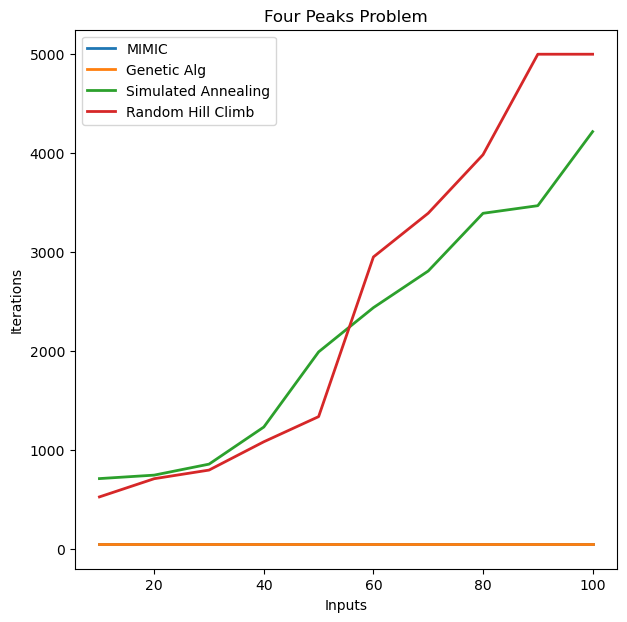

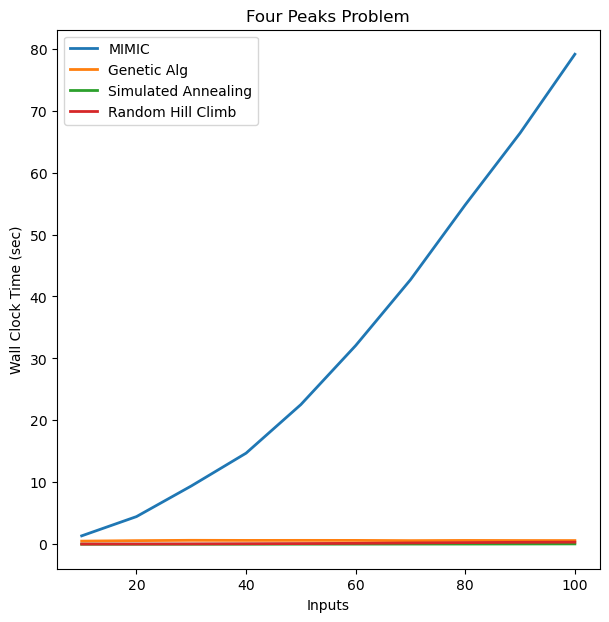

In [35]:
l = [("Inputs", "Iterations"),
     ("Inputs", "Wall Clock Time (sec)")]

for i in range(2):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("Four Peaks Problem")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)

        plt.legend(loc="best")
    plt.show()

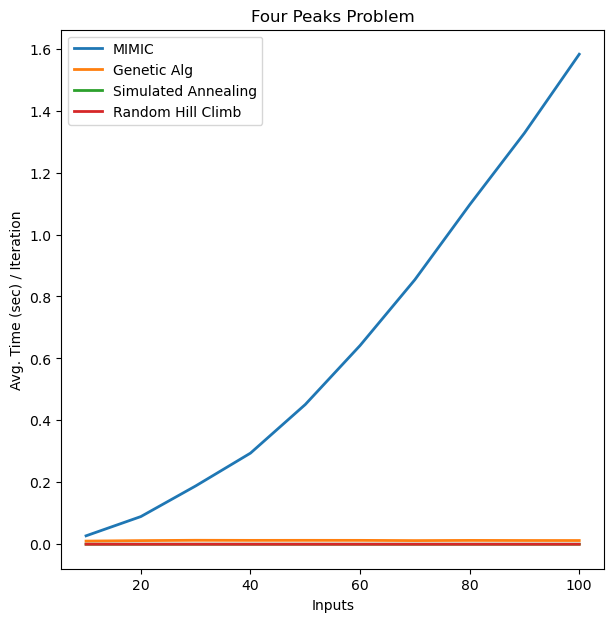

In [37]:
plt.xlabel("Inputs")
plt.ylabel("Avg. Time (sec) / Iteration")
plt.title("Four Peaks Problem")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[1] for x in curve]) / np.array([x[0] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()